# *Group Exam INFO284 V21*

# *SALE PRICE PREDICTION NYC SALES*
# -----------------------------------------------------------------------------------------------------------

## Table of contents:

#### 1.0 [Introduction](#ex1)
> ##### 1.1 [Imports](#imprt)

#### 2.0 [Exploring the Data](#explr)
>##### 2.1 [The Countinous features](#2.1)
>##### 2.2 [The Catagorical features](#2.2)

#### 3.0 [Cleaning the Data](#3.0)
>##### 3.1 [Dropping Data](#3.1)
>##### 3.2 [Cleaning Sales Price](#3.2)
>##### 3.3 [Cleaning Square Feet](#3.3)
>##### 3.4 [Cleaning Sale Date](#3.4)
>##### 3.5 [Cleaning ...Units](#3.5)
>##### 3.6 [Cleaning Tax Class](#3.6)
>##### 3.7 [Cleaning Building Class](#3.7)
>##### 3.8 [Cleaning Borough](#3.8)
>##### 3.9 [Cleaning Year Built](#3.9)
>##### 3.10 [Cleaning Nieghborhood](#3.10)
>##### 3.11 [Cleaning Overview](#3.11)

#### 4.0 [Data Pre-Processing](#4.0)
>##### 4.1 [Making Categorical Data more Appropriate For Regression Models](#4.0)
>##### 4.2 [K-means Unsupervised Learning](#4.2)
>##### 4.3 [PCA](#4.3)
>##### 4.4 [Categorical Pre Proccesing](#4.4)

#### 5.0 [Model Predictions](#5.0)

### **Members: Didrik Nettelhorst Krog, Jonas Bech Holtan, Gunnar Hole Gjengedal, Snorre Alvsvåg**


## 1.0 Introduction
### The task
You are supposed to build at least five machine learning models from the NYC Property Sales dataset to predict or
classify one relevant target feature for new data points. You can choose target feature yourself, but
sales price is perhaps the most suitable. You may also reduce the number of data points somewhat
by focusing on only specific meaningful parts of the data. Or perhaps you will try dimension
reduction.

### Our Approach

We will explore our data by conducting a *Exploratory Data Analysis*. Here we will look at the data and make note of important features, non important features, and in general inform ourselves with the data. In part 2, we will generally clean the data, remove empty or unique columns and so on. In part 3 we will start to fit the models, we will also change the data in preparation of each model. And at last we will present the results, and analyze the different approaches we took with out models.

We have chosen these supervised machine learning algorythms:

1.
- K-Nearest Neighbor

2.
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor

3.
- Linear Reggresion 
- Ridge Reggression
- Lasso Regression

4.
- Neural Network (MLPRegressor)

5.
- Support Vector Machine (SVR, LinearSVR, NuSVC, SVC)

6.
- Gaussian Naive Bayes
- Bernoulli Naive Bayes

We have chosen one unsupervised machine learning algorythms:

- Clustering

Moving forward we will start by learing about our data

<a name="imprt"></a>
### 1.1 Importing Dataset and Others

In [3]:
#General imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

#Training and test imports
from sklearn.model_selection import train_test_split

#Machine Learning Models imports
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.svm import LinearSVR, SVR, NuSVR

#Encoder import
from sklearn.preprocessing import LabelEncoder

#Scaling import
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Grid Search import
from sklearn.model_selection import GridSearchCV

#PCA import
from sklearn.decomposition import PCA

#Dataset import
df = pd.read_csv(r"C:\Users\Eier\desktop\Info284\nyc-rolling-sales.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Eier\\desktop\\Info284\\nyc-rolling-sales.csv'

<a name="explr"></a>
## 2.0 Exploration of the Data

**The first thing we need to do is to look at the data to know what we are handling.**

In [429]:
df.head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [430]:
df.shape

(84548, 22)

**As the shape above shows, this dataset is extremely large and this will affect our Models.**

In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GRO

**We have several different types of data that are both object  and continous. Before going on cleaning the data, it is necassary for this assignment that we convert them to the appropriate types.**

**For our models to work, we need to clean up every single feature and check if the feature has to be categorical or continous. Just by looking at the list above, we can get some sense off which features that need to be categorical and continous.**
<a name="2.1"></a>
### 2.1 **The countinous features**

- SALE PRICE
    - Depending on which models we are using, 'SALE PRICE' will be continous and categorical. This is because this feature will       serve as our target feature and must be the apprioriate type for the specific models. 
    
- LAND SQUARE FEET
    - The land area of the property listed in square feet.
    
- GROSS SQUARE FEET 
    - The total area of all the floors of a building as measured from the exterior surfaces of the outside walls of the
      building, including the land area and space within any building or structure on the property.
      
- SALE DATE 
    - This is going to be categorical and converted to 'MONTH SOLD' and 'YEAR SOLD' because of the feature having the type           TimeStamp. 'MONTH SOLD' is the month of when the property is sold. 'YEAR SOLD' is the year the
      property was sold.
    
- COMMERCIAL UNITS
    - The number of commercial units at the listed property.
    
- RESIDENTIAL UNITS 
    - The number of residential units at the listed property.
    
- TOTAL UNITS
    - The total number of units at the listed property.
    
- BLOCK
    - Because there are more than 11k unique blocks in the dataset, it doesn't make sense to define it as a categorical 
      variable
      
- LOT
    - The same reason as 'BLOCK' feature
<a name = "2.2"></a>

### 2.2 **The categorical features**

- BOROUGH
    - A digit code for the borough the property is located in. In order, these are Manhattan (1), Bronx (2), Brooklyn (3),
      Queens (4), and Staten Island (5).
      
- NEIGHBORHOOD
    - Names of the neighboohoods, these will work better as a categorical feature than a numerical
    
- ZIP CODE
    - The property’s postal code. Makes more sense being categorical because it contains a finite number of distinct groups.
    
- BUILDING CLASS CATEGORY
    - Easier identifiable categories of the possible types of buldings.
    
- TAX CLASS AT PRESENT
    - Every property in the city is assigned to one of four tax classes, based on the use of the property.
    
- BUILDING CLASS AT PRESENT
    - The Building Classification is used to describe a property’s constructive use. The first position of the Building Class
      is a letter that is used to describe a general class of properties. The second position, a number, adds more specific
      information about the property’s use or construction style.
      
- YEAR BUILT
    - Year the structure on the property was built.
    
- TAX CLASS AT TIME OF SALE
    - See 'TAX CLASS AT PRESENT'
    
- BUILDING CLASS AT TIME OF SALE
    - See 'BUILDING CLASS AT PRSENT'

**The features we defintely dont need is :**

- Unnamed: 0 
    - Dropping it because it just looks like an iterator
    
- EASE-MENT 
    - Because it doesn't contains any values
    
- APARTMENT NUMBER 
    - The number of the apartment is not relevant for sale price
    
- ADDRESS
    - Address is just listed as names and we feel that it won't affect the sales price prediction at all.

<a name="3.0"></a>
## 3.0 Cleaning the Overall Data

**The next session is about converting, reducing and cleaning the features we are going to use in our models. The type of cleaning we are doing here is for the Regression and Tree Models we are using later in the code. Since we also are using Gaussian and Bernoulli Naive Bayes Models, there will be a second data cleaning and pre-processing later in the code after the codes mentioned above.**

**Either way, the most important in this data cleaning here is to convert the necessary features to more appropriate types and remove most of the outliers. We will end up with some outliers either way because of the complexity of our dataset. However, with our Unsupervised Machine Learning Model, k-means, the models is expected to perform good even with many outliers.** 

<a name="3.1"></a>
### 3.1 Dropping Data

Dropping the features we definetly dont need

In [432]:
df = df.drop(['EASE-MENT', 'Unnamed: 0', 'APARTMENT NUMBER', "ADDRESS"], axis=1)

Checking the dataset for any duplicates

In [433]:
sum(df.duplicated(df.columns))

956

Removing the duplicates

In [434]:
df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

Checking if there are any null values in the dataframe

In [435]:
df.isna().any(), df.isnull().any()

(BOROUGH                           False
 NEIGHBORHOOD                      False
 BUILDING CLASS CATEGORY           False
 TAX CLASS AT PRESENT              False
 BLOCK                             False
 LOT                               False
 BUILDING CLASS AT PRESENT         False
 ZIP CODE                          False
 RESIDENTIAL UNITS                 False
 COMMERCIAL UNITS                  False
 TOTAL UNITS                       False
 LAND SQUARE FEET                  False
 GROSS SQUARE FEET                 False
 YEAR BUILT                        False
 TAX CLASS AT TIME OF SALE         False
 BUILDING CLASS AT TIME OF SALE    False
 SALE PRICE                        False
 SALE DATE                         False
 dtype: bool, BOROUGH                           False
 NEIGHBORHOOD                      False
 BUILDING CLASS CATEGORY           False
 TAX CLASS AT PRESENT              False
 BLOCK                             False
 LOT                               False
 BU

Replacing empty or '-' values with NaN

In [436]:
df = df.replace(' ', np.nan)
df = df.replace(' -  ', np.nan)

An overview of where the NaN values are. 

In [437]:
print("Percentage null or na values in Dataset\n-------------------------------------")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in Dataset
-------------------------------------


BOROUGH                            0.00
NEIGHBORHOOD                       0.00
BUILDING CLASS CATEGORY            0.00
TAX CLASS AT PRESENT               0.88
BLOCK                              0.00
LOT                                0.00
BUILDING CLASS AT PRESENT          0.88
ZIP CODE                           0.00
RESIDENTIAL UNITS                  0.00
COMMERCIAL UNITS                   0.00
TOTAL UNITS                        0.00
LAND SQUARE FEET                  31.05
GROSS SQUARE FEET                 32.64
YEAR BUILT                         0.00
TAX CLASS AT TIME OF SALE          0.00
BUILDING CLASS AT TIME OF SALE     0.00
SALE PRICE                        16.84
SALE DATE                          0.00
dtype: float64

** Removing some of the features **

Before further inspections, we decided to remove some more of the features because we dont think they are necessary and by that reducing some complexity in this dataset. These are:

- "ZIP CODE" : 

- "BLOCK" :

- "LOT" : 

In [438]:
df = df.drop(['ZIP CODE', 'BLOCK', 'LOT'], axis=1)

<a name="3.2"></a>
### 3.2 Cleaning Sale Price

Dropping all the NaN values

In [439]:
df = df.dropna(subset=['SALE PRICE'])

Converting 'SALE PRICE' to a more appropriate type

In [440]:
df["SALE PRICE"] = df["SALE PRICE"].astype(float)

Making a diagram to get a view of how 'SALE PRICE' is distributed

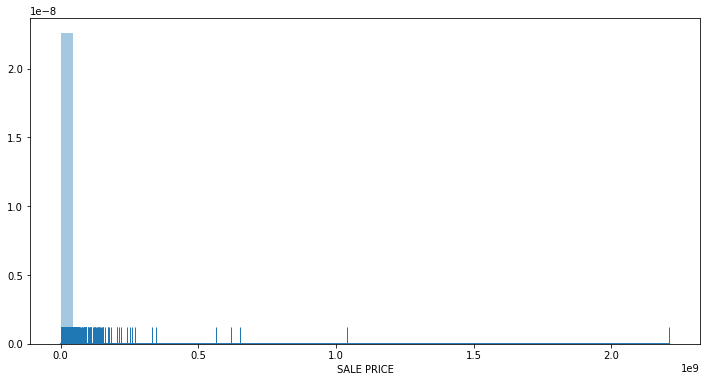

In [441]:
plt.figure(figsize=(12,6))
sns.distplot(df['SALE PRICE'], kde=True, bins=50, rug=True)
plt.show()

From the distribution above, there are a lot of outliers around 2.000.000 and above. At the same time, the majority of the values are close to 0. The most optimal place seems to be between 3.000.000 and 0.

In [442]:
df[(df['SALE PRICE'] < 10000) | (df['SALE PRICE'] > 3000000)]['SALE PRICE'].count() /len(df) 

0.22136712793808797

This shows that 22% of the values are either greater than 3.000.000 or less than 10.000. We remove this to get a better distribution of 'SALE PRICE'

In [443]:
df= df[(df['SALE PRICE'] > 10000) & (df['SALE PRICE']<3000000)]

In [444]:
df['SALE PRICE'].value_counts().head(10)

450000.0    426
550000.0    416
650000.0    413
600000.0    409
700000.0    382
400000.0    377
750000.0    376
500000.0    350
300000.0    348
350000.0    341
Name: SALE PRICE, dtype: int64

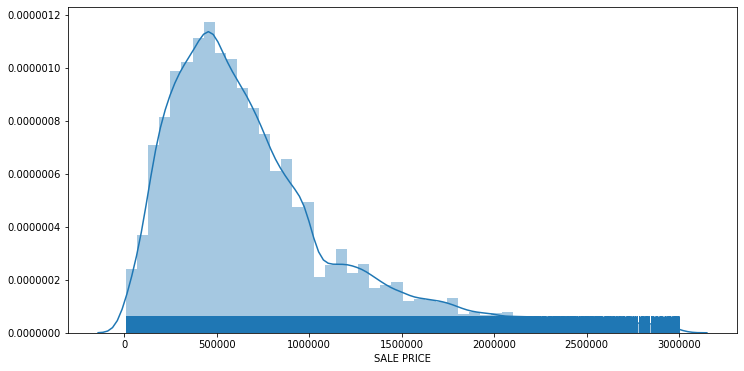

In [445]:
plt.figure(figsize=(12,6))
sns.distplot(df['SALE PRICE'], kde=True, bins=50, rug=True)
plt.show()

**The 'SALE PRICE' feature, our target feature, is now more appropriated distributed for our models.**

<a name="3.3"><a>
### 3.3 Cleaning Square Feet

There are a lot of missing values in these features.
We can either fill them up with the mean average or remove them.

For the time being, lets remove this missing features.

In [446]:
df = df.dropna(subset=['LAND SQUARE FEET'])
df = df.dropna(subset=['GROSS SQUARE FEET'])

Converting the features to a more appropriate type

In [447]:
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].astype(float)
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].astype(float)

In [448]:
df['LAND SQUARE FEET'].value_counts().head(10)

0.0       7854
2000.0    2303
2500.0    2028
4000.0    1820
1800.0     754
3000.0     734
5000.0     549
2400.0     327
1900.0     303
6000.0     271
Name: LAND SQUARE FEET, dtype: int64

In [449]:
df['GROSS SQUARE FEET'].value_counts().head(10)

0.0       8256
1800.0     242
1600.0     235
1440.0     232
2400.0     229
2000.0     221
1200.0     200
1280.0     188
3000.0     173
1224.0     164
Name: GROSS SQUARE FEET, dtype: int64

There are a lot of 0 values here, and means that the properties in this category has no square feet. We will remove these

In [450]:
df = df[df['LAND SQUARE FEET'] > 10]

In [451]:
df = df[df['GROSS SQUARE FEET'] > 10]

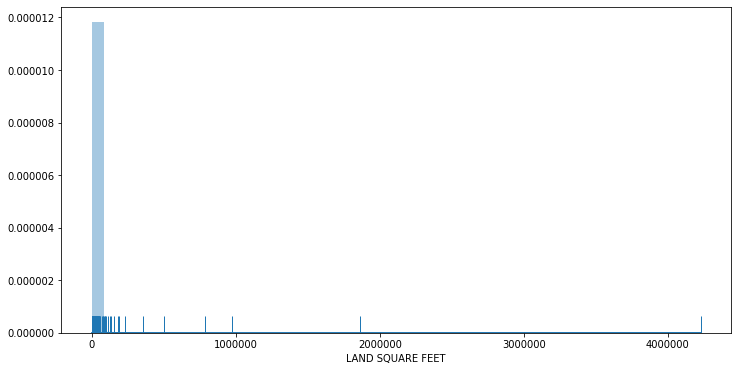

In [452]:
plt.figure(figsize=(12,6))
sns.distplot(df['LAND SQUARE FEET'], kde=True, bins=50, rug=True)
plt.show()

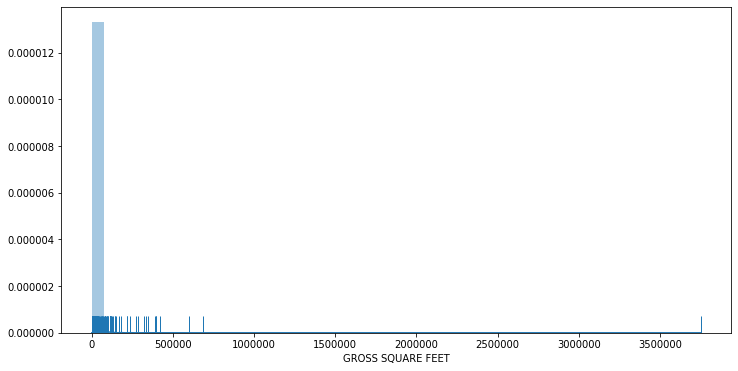

In [453]:
plt.figure(figsize=(12,6))
sns.distplot(df['GROSS SQUARE FEET'], kde=True, bins=50, rug=True)
plt.show()

As it is possible to see from the diagrams and value_counts(), there are still a lot of outliers in these features. 
These can be cleaned by just reducing the number of values.

In [454]:
df = df[df['LAND SQUARE FEET'] < 20000]

In [455]:
df = df[df['GROSS SQUARE FEET'] < 20000]

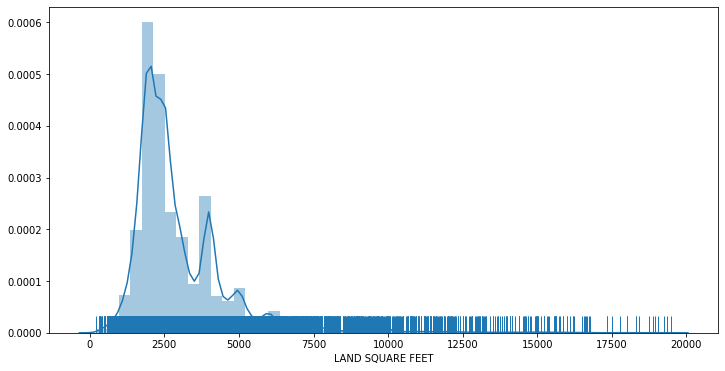

In [456]:
plt.figure(figsize=(12,6))
sns.distplot(df['LAND SQUARE FEET'], kde=True, bins=50, rug=True)
plt.show()

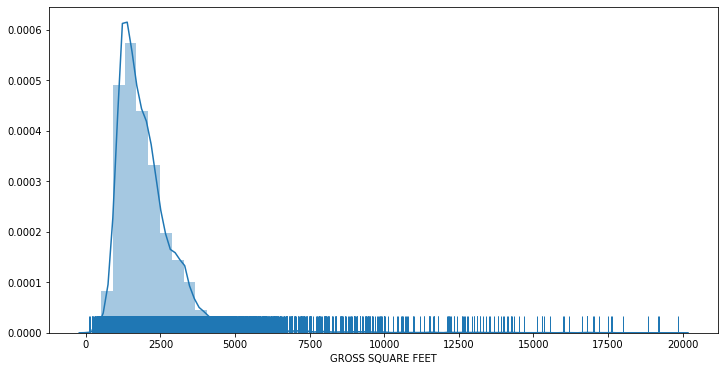

In [457]:
plt.figure(figsize=(12,6))
sns.distplot(df['GROSS SQUARE FEET'], kde=True, bins=50, rug=True)
plt.show()

**The 'Square Feet' features are now a better distributed feature**

<a name="3.4"><a>
### 3.4 Cleaning Sale Date

**TimeStamp types are hard to work with. Therefore, we make the 'SALE DATE' feature to two distinct features 'YEAR SOLD' and
'MONTH SOLD'. These two features can help us later in further analysis of the data**

In [458]:
df['SALE DATE'].value_counts().head()

2017-04-28 00:00:00    183
2016-09-30 00:00:00    175
2017-02-28 00:00:00    173
2016-12-22 00:00:00    171
2016-10-28 00:00:00    169
Name: SALE DATE, dtype: int64

Making a list with alle the different months 

In [459]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

Spliting Sale Date into two features, one for Month Sold and one for Year Sold. 

In [460]:
df['YEAR SOLD'] = [int(n[0:4]) for n in df['SALE DATE']]
df['MONTH SOLD'] = [int(n[5:7]) for n in df['SALE DATE']]
df = df.drop(['SALE DATE'], axis=1)

Text(0.5, 1.0, 'Number of properties sold by year')

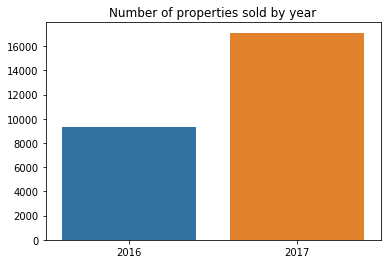

In [461]:
plt.hist(df['YEAR SOLD'], bins=2, color='c')
counts_per_year = [sum(df['YEAR SOLD'] == 2016), sum(df['YEAR SOLD'] == 2017)]
sns.barplot([2016, 2017], counts_per_year).set_title('Number of properties sold by year')

This histogram shows that there were significant more houses sold in 2017 than in 2016, showing an increase that may indicate more properties being sold in 2018.

Code retrieved from: https://jshams.github.io/NYC-real-estate-analysis/new_york_real_estate.slides.html#/5/2 and https://jshams.github.io/NYC-real-estate-analysis/new_york_real_estate.slides.html#/6/2

Transforming to more appriopriate types

In [462]:
df['MONTH SOLD'] = df['MONTH SOLD'].astype('category')

In [463]:
df['YEAR SOLD'] = df['YEAR SOLD'].astype('category')

<a name="3.5"><a>
### 3.5 Cleaning "... Units"

Dropping 'TOTAL UNITS' because its only the sum of 'RESIDENTIAL UNITS' and 'COMMERCIAL UNITS'

In [464]:
df = df.drop(['TOTAL UNITS'], axis=1)

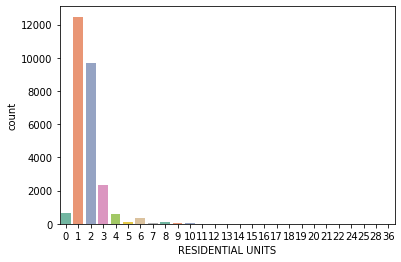

In [465]:
sns.countplot('RESIDENTIAL UNITS',data=df,palette='Set2')

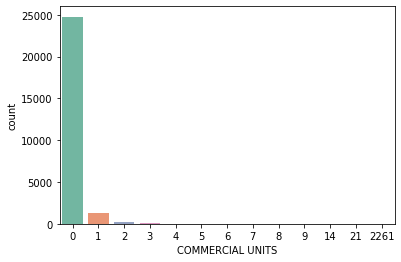

In [466]:
sns.countplot('COMMERCIAL UNITS',data=df,palette='Set2')

In [467]:
df= df[(df['COMMERCIAL UNITS'] < 7)]

In [468]:
df= df[(df['RESIDENTIAL UNITS'] < 10)]

<a name="3.6"><a>
### 3.6 Cleaning Tax Class

Dropping all the NaN values

In [469]:
df = df.dropna(subset=['TAX CLASS AT PRESENT'])

In [470]:
df['TAX CLASS AT TIME OF SALE'].value_counts()

1    24241
2     1331
4      755
Name: TAX CLASS AT TIME OF SALE, dtype: int64

In [471]:
df['TAX CLASS AT PRESENT'].value_counts()

1     24245
2A     1113
4       753
2B      213
2         3
Name: TAX CLASS AT PRESENT, dtype: int64

Tax classes, as mentioned earlier, should be categorical classes. Therefore, it is more appropriate to replace the values to more informative values as shown below

In [472]:
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].replace({1:'Class_1',
                                                                           2:'Class_2',
                                                                           4:'Class_4'})

In [473]:
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].replace({'1':'Class_1',
                                                                 '1A':'Class_1',
                                                                 '1B':'Class_1',
                                                                 '1C':'Class_1',
                                                                 '2':'Class_2',
                                                                 '2A':'Class_2',
                                                                 '2B':'Class_2',
                                                                 '2C':'Class_2',
                                                                 '3':'Class_3',
                                                                 '4':'Class_4'})

Converting the features to more appropiate types

In [474]:
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')

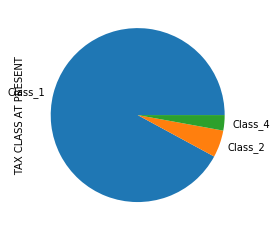

In [475]:
df['TAX CLASS AT PRESENT'].value_counts().plot(kind='pie')

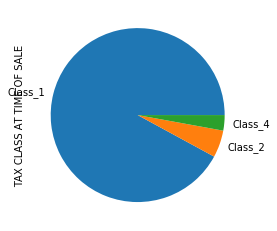

In [476]:
df['TAX CLASS AT TIME OF SALE'].value_counts().plot(kind='pie')

**These pie charts show that more than 3/4 of all the values in the features belong to class_1. This makes sense since most of the properties sold are usually residential properties** 

- Class 1: Includes most residential property of up to three units (such as one-, two-, and three-family homes and small stores   or offices with one or two attached apartments), vacant land that is zoned for residential use, and most condominiums that     are not more than three stories.
- Class 2: Includes all other property that is primarily residential, such as cooperatives and condominiums.
- Class 4: Includes all other properties not included in class 1,2, and 3, such as offices, factories, warehouses, garage         buildings, etc. 

**We have chosen to not remove class_2 and class_4 because we want to focus on all of the properties instead of only focusing on residential properties.**

<a name="3.7"><a>
### 3.7 Cleaning Buliding Class

Converting the features to more appropiate types

In [477]:
df['BUILDING CLASS AT TIME OF SALE'] = df['BUILDING CLASS AT TIME OF SALE'].astype('category')

'BUILDING CLASS AT TIME OF SALE' and 'BUILDING CLASS CATEGORY' are essencially the same. We remove one of them to prevent having to many features.

In [478]:
df = df.drop(['BUILDING CLASS AT PRESENT'], axis=1)

In [479]:
df['BUILDING CLASS CATEGORY'].value_counts()

01 ONE FAMILY DWELLINGS                        12389
02 TWO FAMILY DWELLINGS                         9590
03 THREE FAMILY DWELLINGS                       2239
07 RENTALS - WALKUP APARTMENTS                  1077
22 STORE BUILDINGS                               307
14 RENTALS - 4-10 UNIT                           253
29 COMMERCIAL GARAGES                            111
21 OFFICE BUILDINGS                              105
30 WAREHOUSES                                     94
27 FACTORIES                                      51
37 RELIGIOUS FACILITIES                           43
05 TAX CLASS 1 VACANT LAND                        12
06 TAX CLASS 1 - OTHER                            11
33 EDUCATIONAL FACILITIES                         11
35 INDOOR PUBLIC AND CULTURAL FACILITIES           9
41 TAX CLASS 4 - OTHER                             9
32 HOSPITAL AND HEALTH FACILITIES                  7
38 ASYLUMS AND HOMES                               3
23 LOFT BUILDINGS                             

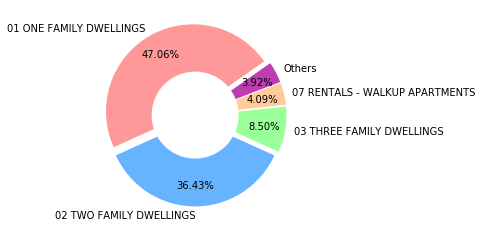

In [480]:
property_types = {'01 ONE FAMILY DWELLINGS': 12389,
 '02 TWO FAMILY DWELLINGS': 9590,
 '03 THREE FAMILY DWELLINGS': 2239,
 '07 RENTALS - WALKUP APARTMENTS': 1077,
 'Others' : 1032}                         # 'Others' here is the sum of fifth - 28th value given above

labels = property_types.keys()
sizes = property_types.values()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#be3cb2']
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.2f%%',startangle=35, pctdistance=0.75, explode = tuple([0.05] * 5))
centre_circle = plt.Circle((0,0),0.50,fc='#ffffff')
plt.gcf().gca().add_artist(centre_circle)

**From the value_count() and Pie Chart above, we can observe that the first four values stands out the most and the rest should rather be one value to reduce the number of unique values. This is because the 'Others' value in the Pie Chart is a lower percentage than the fourth value alone. This again is no suprise since the biggest values here are residential properties, and as we could see from the 'TAX CLASS' cleaning above, most of the properties sold are residential properties.**

**We tried to make a new value called 'Others' with the fifth, all the way down to the 20th value, but it seems it is not possible to combine all of them. Either way, we chose to keep the feature anyway.**

Code retrieved from: https://jshams.github.io/NYC-real-estate-analysis/new_york_real_estate.slides.html#/8

Converting to a more appropriate feature

In [481]:
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].astype('category')

<a name="3.8"><a>
### 3.8 Cleaning Borough

**Since 'BOROUGH' is going to be categorical, we might as well change the values or the borough index to borough real name in New York City**

In [482]:
df['BOROUGH'][df['BOROUGH'] == 1] = 'Manhattan'
df['BOROUGH'][df['BOROUGH'] == 2] = 'Bronx'
df['BOROUGH'][df['BOROUGH'] == 3] = 'Brooklyn'
df['BOROUGH'][df['BOROUGH'] == 4] = 'Queens'
df['BOROUGH'][df['BOROUGH'] == 5] = 'Staten Island'

C:\Users\Eier\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Converting 'BOROUGH' to a more appropriate types

In [483]:
df['BOROUGH'] = df['BOROUGH'].astype('category')

Trying to visualize how much property is sold in each borough.

Text(0.5, 1.0, 'Sales per Borough')

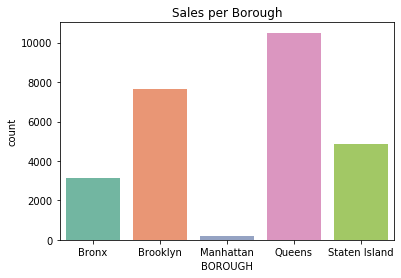

In [484]:
sns.countplot('BOROUGH',data=df,palette='Set2')
plt.title('Sales per Borough')

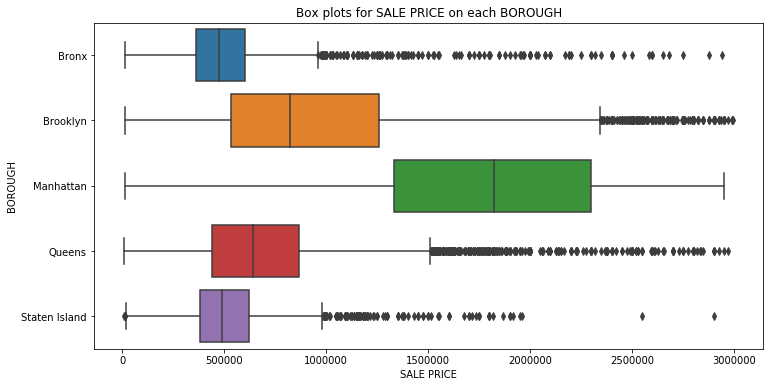

In [485]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'BOROUGH', x = 'SALE PRICE', data = df )
plt.title('Box plots for SALE PRICE on each BOROUGH')
plt.show()

**These diagrams above shows us how big difference there are of properties sold compared to all of the boroughs, and the outliers that exists within the values. It is possible to see that 'Manhattan' has the least properties, but no outliers, while 'Staten Island' and 'Bronx' have a lot of outliers, but has neither least or most properties sold**

<a name="3.9"><a>
### 3.9 Cleaning Year Built

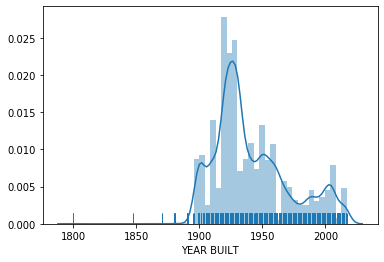

In [486]:
df=df[df['YEAR BUILT']!=0]
sns.distplot(df['YEAR BUILT'], bins=50, rug=True)
plt.show()

**As its possible to se from the graph above, this feature will work best if the values from 1800 - 1900 are removed because then the feature will be better distributed. With this, we also remove some of the possible outliers in our model.**

In [487]:
df= df[(df['YEAR BUILT'] > 1880)]

Converting the feature to a more appropriate type

In [488]:
df['YEAR BUILT'] = df['YEAR BUILT'].astype('category')

<a name="3.10"><a>
### 3.10 Cleaning Neighborhood

Converting the feature to a more appropriate type

In [489]:
df['NEIGHBORHOOD'] = df['NEIGHBORHOOD'].astype('category')

<a name="3.11"><a>
### 3.11 Post Cleaning Overview

In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26309 entries, 222 to 84547
Data columns (total 14 columns):
BOROUGH                           26309 non-null category
NEIGHBORHOOD                      26309 non-null category
BUILDING CLASS CATEGORY           26309 non-null category
TAX CLASS AT PRESENT              26309 non-null category
RESIDENTIAL UNITS                 26309 non-null int64
COMMERCIAL UNITS                  26309 non-null int64
LAND SQUARE FEET                  26309 non-null float64
GROSS SQUARE FEET                 26309 non-null float64
YEAR BUILT                        26309 non-null category
TAX CLASS AT TIME OF SALE         26309 non-null category
BUILDING CLASS AT TIME OF SALE    26309 non-null category
SALE PRICE                        26309 non-null float64
YEAR SOLD                         26309 non-null category
MONTH SOLD                        26309 non-null category
dtypes: category(9), float64(3), int64(2)
memory usage: 1.5 MB


In [491]:
df.shape

(26309, 14)

**By now, all the necessary features have been cleaned from most of outliners and converted to the preferred types needed for the algorithms. We have also reduced the dataset to a significant amount to prevent a high dimensionality, while keeping most of the important feature**

<a name="4.0"><a>
## 4.0 Data Pre-Processing
### 4.1 Making Categorical Data more Appropriate For Regression Models

**Since most of our models prefer continous features, and our dataset contains an significant amount categorical data, we have to encode our categorical data so we can actually use the features in our models. For this we will use One-Hot-Encoding and Label Encoding, depending on how many unique values there exists in the features.** 

In [492]:
df['BOROUGH'].unique()

[Manhattan, Bronx, Brooklyn, Queens, Staten Island]
Categories (5, object): [Manhattan, Bronx, Brooklyn, Queens, Staten Island]

In [493]:
df['TAX CLASS AT PRESENT'].unique()

[Class_2, Class_4, Class_1]
Categories (3, object): [Class_2, Class_4, Class_1]

In [494]:
df['TAX CLASS AT TIME OF SALE'].unique()

[Class_2, Class_4, Class_1]
Categories (3, object): [Class_2, Class_4, Class_1]

In [495]:
df['BUILDING CLASS CATEGORY'].unique()

[07 RENTALS - WALKUP APARTMENTS, 22 STORE BUILDINGS, 01 ONE FAMILY DWELLINGS, 02 TWO FAMILY DWELLINGS, 03 THREE FAMILY DWELLINGS, ..., 33 EDUCATIONAL FACILITIES, 38 ASYLUMS AND HOMES, 31 COMMERCIAL VACANT LAND, 35 INDOOR PUBLIC AND CULTURAL FACILITIES, 08 RENTALS - ELEVATOR APARTMENTS]
Length: 22
Categories (22, object): [07 RENTALS - WALKUP APARTMENTS, 22 STORE BUILDINGS, 01 ONE FAMILY DWELLINGS, 02 TWO FAMILY DWELLINGS, ..., 38 ASYLUMS AND HOMES, 31 COMMERCIAL VACANT LAND, 35 INDOOR PUBLIC AND CULTURAL FACILITIES, 08 RENTALS - ELEVATOR APARTMENTS]

In [496]:
df['YEAR SOLD'].unique()

[2017, 2016]
Categories (2, int64): [2017, 2016]

**These categorical features above have few unique values which makes One-Hot-Encoding the most appropriate way to make the features work in our Models**

**We make a list of all these features for an easier overview**

In [497]:
one_hot_features = ['BOROUGH', 'TAX CLASS AT PRESENT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS CATEGORY', 'YEAR SOLD']

In [498]:
one_hot_encoded = pd.get_dummies(df[one_hot_features])

df = df.drop(one_hot_features, axis = 1)

df = pd.concat([df, one_hot_encoded], axis=1)

**The rest of the categorical features are a little bit different. There are hundres of unique features which makes Label Encoding more appropriate than One-Hot-Encoding. This is for preventing a higher dimensionality and ending up with many more features necassary.**

In [499]:
label_encoder = LabelEncoder()

In [500]:
df['NEIGHBORHOOD'].unique()

[CHELSEA, CHINATOWN, GREENWICH VILLAGE-WEST, HARLEM-CENTRAL, HARLEM-EAST, ..., TRAVIS, WEST NEW BRIGHTON, WESTERLEIGH, WILLOWBROOK, WOODROW]
Length: 226
Categories (226, object): [CHELSEA, CHINATOWN, GREENWICH VILLAGE-WEST, HARLEM-CENTRAL, ..., WEST NEW BRIGHTON, WESTERLEIGH, WILLOWBROOK, WOODROW]

In [501]:
df['BUILDING CLASS AT TIME OF SALE'].unique()

[C4, K4, A5, C2, A4, ..., GU, W8, H8, Z0, M3]
Length: 82
Categories (82, object): [C4, K4, A5, C2, ..., W8, H8, Z0, M3]

In [502]:
df['YEAR BUILT'].unique()

[1901, 1915, 1900, 1910, 1899, ..., 1978, 1891, 1881, 1943, 2017]
Length: 123
Categories (123, int64): [1901, 1915, 1900, 1910, ..., 1891, 1881, 1943, 2017]

In [503]:
df['MONTH SOLD'].unique()

[8, 1, 10, 5, 11, ..., 9, 2, 6, 12, 4]
Length: 12
Categories (12, int64): [8, 1, 10, 5, ..., 2, 6, 12, 4]

In [504]:
df['NEIGHBORHOOD'] = label_encoder.fit_transform(df['NEIGHBORHOOD'])

In [505]:
df['BUILDING CLASS AT TIME OF SALE'] = label_encoder.fit_transform(df['BUILDING CLASS AT TIME OF SALE'])

In [506]:
df['YEAR BUILT'] = label_encoder.fit_transform(df['YEAR BUILT'])

In [507]:
df['MONTH SOLD'] = label_encoder.fit_transform(df['MONTH SOLD'])

<a name="4.2"></a>
### 4.2 K-means Unsupervised Learning

**To imporve the overall performance of the models, we decided to use k-means method to make clusters to see if there exists any logical ways to group the data in a feature space**

**We use this k-means because it helps our models to handle the dataset's high dimensionality and manually choosing our k gives use easy access to change our clusters and centroids.**

We start by just making a scattermap overview with all the features.

In [508]:
#scatter_df = df.drop(['SALE PRICE'], axis = 1)

#for col in scatter_df.columns: 
#    plt.scatter(scatter_df[col], df['SALE PRICE']) 
#    plt.ylabel('Sale price') 
#    plt.xlabel(col) 
#    plt.show()

As the scattermaps shows above, the different features are scattered very different from each other because of the categorical features. The continous features show a vide scattered maps and the categorical features are scattered like lines. This will maybe affect our k-means cluster model. 

Since we are using k-means clustering, we need to define a k. k is defined as how many clusters we want in our unsupervised model. Thats why we use the elbow method to get the most optimal k.

The code used below for our Unsupervised Learning Model is retrieved from: https://predictivehacks.com/k-means-elbow-method-code-for-python/

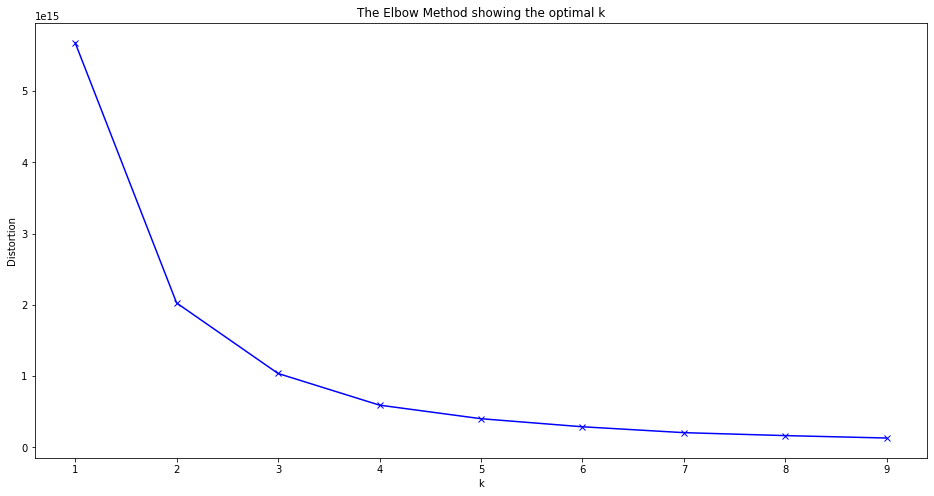

In [509]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-') 
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**The model above shows us that the most optimal k is two. We only need two clusters**

Text(0.5, 1.0, 'K_Means')

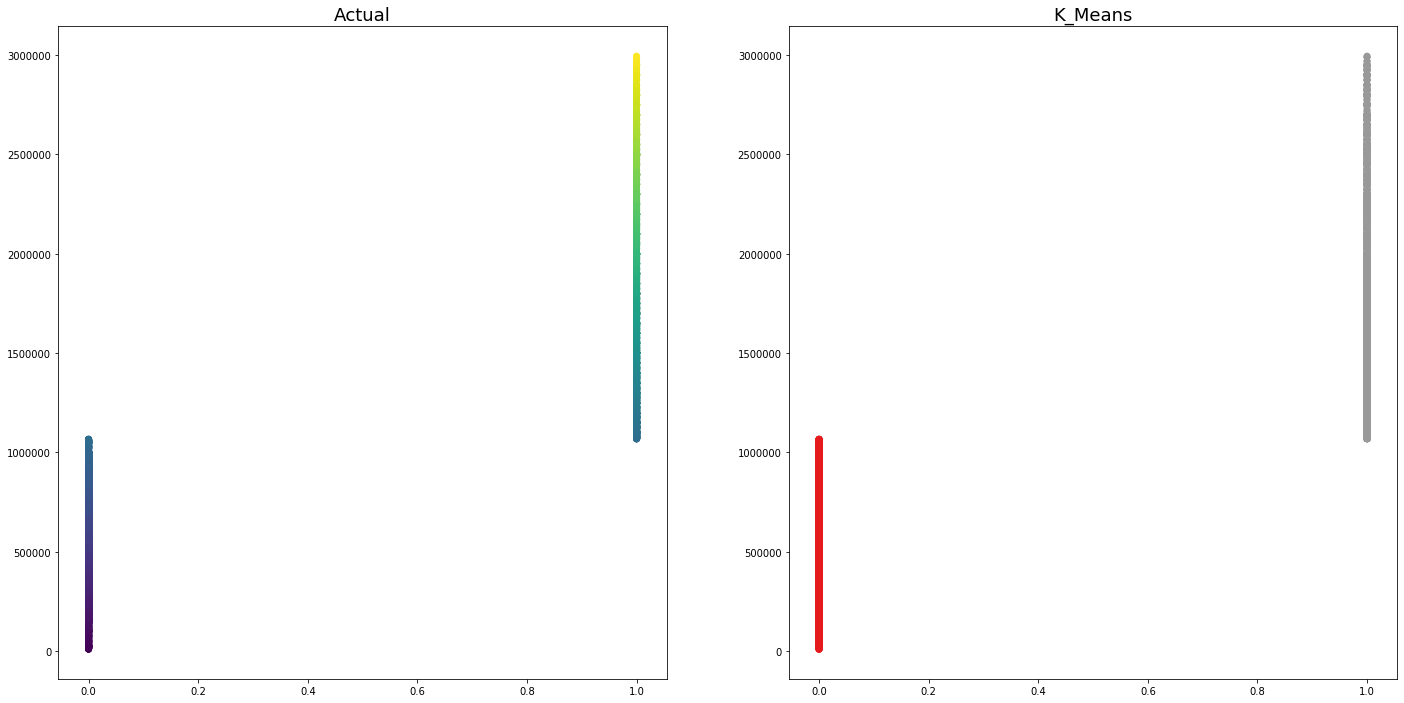

In [510]:
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(df)

df['k_means'] = kmeanModel.predict(df)
df['SALE PRICE'] = df['SALE PRICE']

fig, axes = plt.subplots(1, 2, figsize=(24,12))
axes[0].scatter(df['k_means'], df['SALE PRICE'], c=df['SALE PRICE'])
axes[1].scatter(df['k_means'], df['SALE PRICE'], c=df['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)


**As the models above show, the k-means clustering result is questionable. They show us two straight lines in two very different intervals and does not really give us a good picture on how the groupings of the different features are. The result might be extremely perfect or extremely bad. This might be because of our data having a to high dimensionality or because of the how the categorical features are placed in a feature space, as the scatter maps above shows. Since this cluster is quite special, we did not not know any good ways to further handle and improve it, so we do not to anything more with it.**

**However, as we have seen in different tests of the Machine Learning Models, the visualization of the Unsupervised Learning Model might not be good at all, but the models perform way better with the k-means feature than without. This means that the k-means clustering is of value and there actually are groupings of the features in a feature space.**

**We now create two new copies of the dataset. These two new copies will be scaled differently with the MinMax Scaler and Standard Scaler. This is because we want to see how the Models that need scaling will perform with different scalers.**

In [511]:
minmax_df = df.copy()

In [512]:
minmax_df_columns = minmax_df.columns
minmax_scaler = MinMaxScaler()
minmax_df = minmax_scaler.fit_transform(minmax_df)

minmax_df = pd.DataFrame(minmax_df)
minmax_df.columns = minmax_df_columns

In [513]:
standard_df = df.copy()

In [514]:
standard_df_columns = standard_df.columns
scaler = StandardScaler()
standard_df = scaler.fit_transform(standard_df)

standard_df = pd.DataFrame(standard_df)
standard_df.columns = standard_df_columns

<a name="4.3"></a>
### 4.3 PCA

**To be able to make the most accurate models and test our Models all the possible ways we can, we should also use some Dimension Reduction with Principal Component Ananlysis (PCA).** 

**To do this, we have to use our Standard Scaler**

In [515]:
y = standard_df['SALE PRICE']
x = standard_df.drop(['SALE PRICE'], axis = 1)

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finaldf = pd.concat([principalDf, y], axis = 1)
finaldf.head()

,principal component 1,principal component 2,SALE PRICE
0,10.408135,-7.133868,1.850762
1,9.965136,-7.017790,-0.660989
2,9.965136,-7.017790,-0.201317
3,9.298734,8.898302,4.252987
4,0.141962,-0.674807,1.401292


**Now that we have used our data in the Unsupervised Model, defined our necessary scaling methods and Dimension Reduction, we are now ready to create our Machine Learning Models.**

<a name="4.4"></a>
### 4.4 Categorical Pre-processing
This will be done beneath when working on Gaussian and Bernoully Naive Bayes models.

<a name="5.0"></a>
## 5.0 Model Predictions


For every algorytm we first do some minor or major pre-proccesing, then we complete gridsearches where needed, and finally fit the model. At the end theres a small Analysis. 

<a name="5.1"></a>
### 5.1 Gaussian and Bernoulli Naive Bayes

**This Machine Learning Models is a little bit different than the others. Since this Model is more about classification, we have to, as mentioned before, convert our target feature 'SALE PRICE' into a categorical type. Since the date pre-processing is different than the Models above, we have to do a new pre-processing. This will be based on the pre-processing we did before.** 

<a name="5.1.0"></a>
#### 5.1.0 Pre Proccessing

In [516]:
catedf = df.copy()
catedf['CATEGORICAL PRICE'] = pd.qcut(catedf['SALE PRICE'] , 4 , labels = ['Cheapest' , 
                                                                           'Lower middle' , 'Upper middle' , 'Expensive'])

label_encoder = LabelEncoder()
catedf['CATEGORICAL PRICE'] = label_encoder.fit_transform(catedf['CATEGORICAL PRICE'])
catedf = catedf.drop(['SALE PRICE'], axis = 1)


Classes: 0 = cheapest , 1 = Expensive, 2 = lower middle, 3 = upper middle

Dividing dataframe into one contaning the categorical variables, and one containing the continous. 
Has been categorized using label encoding. These variables are not binary, and can not be used for categorical NaiveBayes, they are dropped. 

In [517]:
categorical_df = catedf.drop(['GROSS SQUARE FEET' , 'LAND SQUARE FEET' , 'COMMERCIAL UNITS' , 'RESIDENTIAL UNITS', 'NEIGHBORHOOD' ,
                              'BUILDING CLASS AT TIME OF SALE', 'YEAR BUILT'] ,  axis = 1)

continous_df = catedf[['GROSS SQUARE FEET' , 'LAND SQUARE FEET' , 'CATEGORICAL PRICE' , 'COMMERCIAL UNITS' , 'RESIDENTIAL UNITS']]

The continous data now need to be given a normal distribution, in order to make GaussianNB valid. 

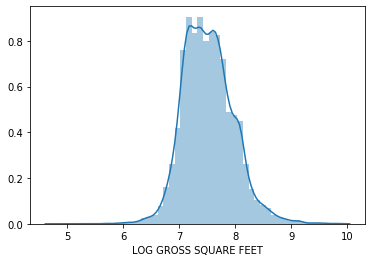

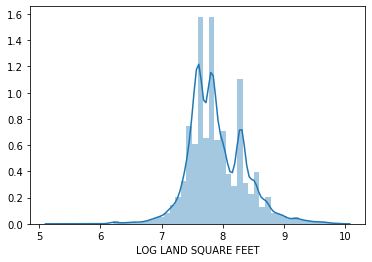

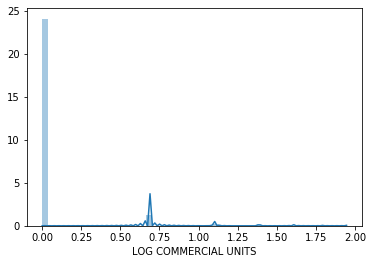

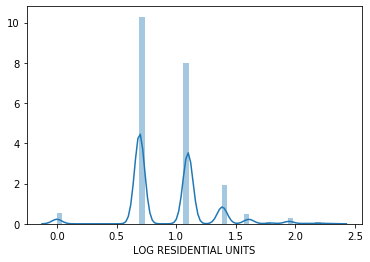

In [518]:
continous_df = continous_df[(continous_df['GROSS SQUARE FEET'] > 0)]
continous_df = continous_df[(continous_df['LAND SQUARE FEET'] > 0)]



continous_df['LOG GROSS SQUARE FEET'] = np.log(continous_df['GROSS SQUARE FEET'])
continous_df['LOG LAND SQUARE FEET'] = np.log(continous_df['LAND SQUARE FEET'])
continous_df['LOG COMMERCIAL UNITS'] = np.log(continous_df['COMMERCIAL UNITS'] +1)
continous_df['LOG RESIDENTIAL UNITS'] = np.log(continous_df['RESIDENTIAL UNITS'] +1 )



column_names = ['LOG GROSS SQUARE FEET' , 'LOG LAND SQUARE FEET' , 'LOG COMMERCIAL UNITS' , 'LOG RESIDENTIAL UNITS' ]
for name in column_names:
    sns.distplot(continous_df[name])
    plt.show()
continous_df.drop(['LOG COMMERCIAL UNITS' , 'LOG RESIDENTIAL UNITS' , 
                   'GROSS SQUARE FEET' , 'LAND SQUARE FEET'], axis = 1 , inplace = True)

**Not even the log distribuitions for residential, and commercial, units are Gaussian. The parameters are therefore dropped. The gross square footage has a Gaussian dustribution. It is however questionable whether the land square footage is sufficiently Gaussian. Both variables will however be included in the model, in order to not keep some of the complexity of the model.**

<a name="5.1.1"></a>
#### 5.1.1 Grid Search

In [519]:
x = continous_df.drop(['CATEGORICAL PRICE'] , axis = 1)
y = continous_df['CATEGORICAL PRICE']

x_train, x_test , y_train , y_test = train_test_split(x,y , random_state = 1)

In [520]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

print("Gaussian Naive Bayes Model")
print("--------------------------")
print()
print("Training set score: {:.5f}".format(gnb.score(x_train, y_train)))
print("Test set score: {:.5f}".format(gnb.score(x_test, y_test)))

Gaussian Naive Bayes Model
--------------------------

Training set score: 0.38761
Test set score: 0.38249


In [2]:
from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(gnb, x_test, y_test)

Performs better then random guessing, however the according to the confusion matrix the model seems to skew the predictions towards the lower middle quarter of the sale prices. The model is especially bad at predicting the cheapest values, as well as the upper middle quarter. 

In [522]:
x = categorical_df.drop(['CATEGORICAL PRICE'] , axis = 1)
y = categorical_df['CATEGORICAL PRICE']

x_train, x_test , y_train , y_test = train_test_split(x, y, random_state = 0 )

In [523]:
#param_grid = {'alpha' : [0.000001 , 0.00001 , 0.0001 , 0.001 , 0.01 , 0.1 , 1 ,10]}
#grid_bernouli = GridSearchCV(BernoulliNB() , param_grid = param_grid)
#grid_bernouli.fit(x_train , y_train)

#print('Grid search with the best accuracy: \n------------------------------------')
#print('Best parameters: ', grid_bernouli.best_params_) 
#print('Best cross validation score(Accuracy): {:.3f}'.format(grid_bernouli.best_score_))

#print('Test set score: {:.3f}'.format(grid_bernouli.score(x_test,y_test)))

The GridSearch above gave us the paramter 'alpha: 0.01' 

In [524]:
bernoulli = BernoulliNB('alpha'== 0.01)
bernoulli.fit(x_train , y_train)

print("Bernoulli Naive Bayes Model")
print("---------------------------")
print()
print("Training set score: {:.5f}".format(bernoulli.score(x_train, y_train)))
print("Test set score: {:.5f}".format(bernoulli.score(x_test, y_test)))

Bernoulli Naive Bayes Model
---------------------------

Training set score: 0.46627
Test set score: 0.45926


C:\Users\Eier\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [525]:
plot_confusion_matrix(bernoulli, x_test, y_test)

The categorical model is more accurate than the Gaussian. From the confusion matrix it is apparent that the model is most adept at correctly identifying the cheapest and most expensive properties. Most often missclassifies into the cheapest category. 

When the model classifies a property as being expensive, i.e in the upper quarter of the sale prices, it rarely misses.

<a name="5.1.2"></a>
#### 5.1.2 Combined Naive Bayes

**To get the best possible score, we will now try combining the categorical and continous variables into one model. First by binning the continous variables.**

In [526]:
continous_df['BINNED LOG LAND SQUARE FEET'] = pd.qcut(continous_df['LOG LAND SQUARE FEET'] ,
                                                  5 )
continous_df['BINNED LOG GROSS SQUARE FEET'] = pd.qcut(continous_df['LOG GROSS SQUARE FEET'] ,
                                                 5)
one_hot_land = pd.get_dummies(continous_df['BINNED LOG LAND SQUARE FEET'])
one_hot_gross = pd.get_dummies(continous_df['BINNED LOG GROSS SQUARE FEET'])

categorical_df = pd.concat([categorical_df , one_hot_land , one_hot_gross],axis = 1)

In [527]:
x = categorical_df.drop(['CATEGORICAL PRICE'] , axis = 1)
y = categorical_df['CATEGORICAL PRICE']

x_train, x_test , y_train , y_test = train_test_split(x,y , random_state = 0 )

In [528]:
#param_grid = {'alpha' : [0.000001 , 0.00001 , 0.0001 , 0.001 , 0.01 , 0.1 , 1 ,10]}
#grid_bernouli = GridSearchCV(BernoulliNB() , param_grid = param_grid)
#grid_bernouli.fit(x_train , y_train)

#print('Grid search with the best accuracy: \n------------------------------------')
#print('Best parameters: ', grid_bernouli.best_params_) 
#print('Best cross validation score(Accuracy): {:.3f}'.format(grid_bernouli.best_score_))

#print('Test set score: {:.3f}'.format(grid_bernouli.score(x_test,y_test)))

The GridSearch above gave us the paramter 'alpha: 0.1'

In [529]:
bernoulli = BernoulliNB('alpha' == 0.1)
bernoulli.fit(x_train , y_train)

print('Training set score: {:.5f}'.format(bernoulli.score(x_train , y_train)))
print('Test set score: {:.5f}'. format(bernoulli.score(x_test , y_test)))

C:\Users\Eier\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Training set score: 0.50089
Test set score: 0.48936


In [530]:
plot_confusion_matrix(bernoulli, x_test, y_test)

Even higher test score than when using only categorical parameters. From the confusion matrix we can tell that the trend where predictions of most expensive are fairly precise. In a even bigger degree than only using categorical variables. It is also apparent that the current model is more adept at classifying the two middle classes.

Will now try another method for combining continous and categorical variables. The approach has been found on: 
https://towardsdatascience.com/naive-bayes-classifier-how-to-successfully-use-it-in-python-ecf76a995069

In [531]:
X = pd.concat([categorical_df.drop(['CATEGORICAL PRICE'] ,axis = 1), continous_df[['LOG GROSS SQUARE FEET' , 'LOG LAND SQUARE FEET']]], axis = 1)
y = categorical_df['CATEGORICAL PRICE']

X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 1)

              

gaussian_model = GaussianNB()
clf_g = gaussian_model.fit(X_train[['LOG GROSS SQUARE FEET' , 'LOG LAND SQUARE FEET']] , y_train)

categorical_model = BernoulliNB()
clf_c = categorical_model.fit(X_train.drop(['LOG GROSS SQUARE FEET' , 'LOG LAND SQUARE FEET'] , axis = 1) 
                              , y_train)


g_train_probs = gaussian_model.predict_proba(X_train[['LOG GROSS SQUARE FEET' , 'LOG LAND SQUARE FEET']])
c_train_probs = categorical_model.predict_proba(X_train.drop(['LOG GROSS SQUARE FEET' , 'LOG LAND SQUARE FEET'], axis = 1 ))
 
g_test_probs = gaussian_model.predict_proba(X_test[['LOG GROSS SQUARE FEET' , 'LOG LAND SQUARE FEET']])                                                 
c_test_probs = categorical_model.predict_proba(X_test.drop(['LOG GROSS SQUARE FEET' , 'LOG LAND SQUARE FEET'], axis = 1 ))


X_new_train = np.c_[(g_train_probs[:,1], c_train_probs[:,1])] # Train
X_new_test = np.c_[(g_test_probs[:,1], c_test_probs[:,1])] # Test

combined_gaussian = GaussianNB()
combined_gaussian.fit(X_new_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [532]:
print("Combined Naive Bayes Model")
print("--------------------------")
print()
print('Training set score: {:.5f}'.format(combined_gaussian.score(X_new_train, y_train)))
print('Test set score: {:.5f}'.format(combined_gaussian.score(X_new_test, y_test)))

Combined Naive Bayes Model
--------------------------

Training set score: 0.43297
Test set score: 0.43250


In [533]:
plot_confusion_matrix(combined_gaussian, X_new_test, y_test)

The final gaussian model has higher accuracy than the first gaussian, however we can tell fom the confusion matrix that the model only really predicts properties to be expensive, or for properties to be in the lower middle quarter of sale prices. The model therefore seems rather useless. However the model can still correctly classify expensive properties with some accuracy. 

<a name="5.1.4"></a>
#### 5.1.4 Analysis

**All the Naive Bayes models perform far better than randomly guessing, however the Bernouli model performs far better their the Gaussian counterparts. Especially the classifier only using continous parameters. This is most likely beacuse the variables used do not have sufficiently gaussian distributions.**

**The combined model with binned continous variables is the best performing Naive Bayes. The usefullness of either of the Naive Bayes models is however questionable, as the Sale price has been divided into four categories. A prediction on whether a property is going to be cheap, expensive or somewhat average is not interesting. Still most of the models can, with decent accuracy, predict if the property is expensive.**

**Furthermore the ammount of processing required to generate these models make the data less "valid". The fact that we had to generate log distributions in order to make Gaussian models, means that the models containing these variables predict on a imaginary version of the dataset.**

**The fact that the models are able to perform better than random guessing is however encouraging for creation of the other models.**

<a name="5.2"></a>
### 5.2 Support Vector Regressor


The Next ML Algorythm we will throw on the Dataset is the **Support Vector Regressor (SVR)**, Support Vector Classifyer`s regressive brother. The reason behind choosing the Support Vector Regressor over the Classifyer comes from the quriosity if it performs better than the newer and more modern Neural Netrwork Regressor we tested earlier. 

We will be testing traditional Support Vector Regressor with the kernels Linear and RBF, even thought there are alot of kernels, they are simply different ways off making the hyperplane decision boundary between the classes, some linearly, and some nonlinearly$^1$. Therefore we limited ourselves to one of each.

Further we will test the **Linear Support Vector Regressor (LinearSVR)**, the difference between this and SVR using the Linear kernel is the epsilon parameter and tolerance (among others). This gives us more flexibility and supposedly it scales better with large numbers of samples$^2$, something that is true for us (n = 26309). 

Lastly we will be using the **Nu Support Vector Regression (NuSVR)**, simular to SVR, with the addition of the `nu` parameter. The `nu` parameter is a an upper boundary on the fraction of training erros and a lower bound on the fraction of support vectors$^2$. Basicly you can control the amount of support vectors used.

We will first conduct a Grid Search for the three models, then we will take these results into the modeling stage, and at last discuss the outcome.

In terms of preproccesing we will simply use the already scaled and handeled `standard_df` dataframe as it is prepared for a regressive Algorythm.

<details>
<summary>Sources</summary>
[1]: Uddin, Md. Palash. (2018). Re: Diffference between SVM Linear, polynmial and RBF kernel?. Retrieved from: https://www.researchgate.net/post/Diffference_between_SVM_Linear_polynmial_and_RBF_kernel/5af811d18272c91a19463943/citation/download.
<br>[2]: Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
</details>


<a name="5.2.0"></a>
#### 5.2.0 Pre Proccesing

In [534]:
y = np.asarray(standard_df["SALE PRICE"], dtype=float)
x = standard_df.drop(["SALE PRICE"], axis = 1)
x = np.asarray(x, dtype=float)

In [535]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=.20,random_state=42)

<a name="5.2.1"></a>
#### 5.2.1 Grid Search

##### Grid Search SVR()

In [536]:
#modelsvr = SVR()
#param = {'kernel' : ('linear', 'rbf'),
#         'C' : [1,3,5,7,10,15]}


#grid_svr = GridSearchCV(modelsvr,param_grid = param, n_jobs = -1, verbose = 2)

#grid_svr.fit(X_train,Y_train)
#print('Grid search with the best accuracy: \n------------------------------------')
#print('Best parameters: ', grid_svr.best_params_) 
#print('Best cross validation score(Accuracy): {:.3f}'.format(grid_svr.best_score_))

#print('Test set score: {:.3f}'.format(grid_svr.score(X_test,Y_test)))

#### Grid search with the best accuracy: 
------------------------------------
Best parameters:  {'C': 3, 'kernel': 'rbf'}
Best cross validation score(Accuracy): 0.700
Test set score: 0.709

##### Grid Search LinearSVR()

In [537]:
#modelsvr = LinearSVR()
#param = {'C' : [0.001,0.01,0.1,0,2,0.3,1,3,5],
#        "tol": [0.00001,0.0001,0.0002,0.0004,0.001],
#        "epsilon": [0.0,0.3,0.5,0.7,0.9,1,1.1]}


#grid_LinSVR = GridSearchCV(modelsvr,param_grid = param, n_jobs = -1, verbose = 2)

#grid_LinSVR.fit(X_train,Y_train)
#print('Grid search with the best accuracy: \n------------------------------------')
#print('Best parameters: ', grid_LinSVR.best_params_) 
#print('Best cross validation score(Accuracy): {:.3f}'.format(grid_LinSVR.best_score_))
#
#print('Test set score: {:.3f}'.format(grid_LinSVR.score(X_test,Y_test)))

#### Grid search with the best accuracy: 
------------------------------------
Best parameters:  {'C': 0.01, 'epsilon': 0.7, 'tol': 0.0002}
Best cross validation score(Accuracy): 0.688
Test set score: 0.690

##### Grid Search NuSVR()

In [538]:
#modelsvr = NuSVR()

#param = {"C": [0.1,0.6,1,1.5,2],
#         "nu": [0.1,0.3,0.5,0.6,0.7],
#         "kernel": ["linear", "rbf"]}

#grid_NuSVR = GridSearchCV(modelsvr,param_grid = param, cv = 3, n_jobs = -1, verbose = 2)

#grid_NuSVR.fit(X_train,Y_train)
#print('Grid search with the best accuracy: \n------------------------------------')
#print('Best parameters: ', grid_NuSVR.best_params_) 
#print('Best cross validation score(Accuracy): {:.3f}'.format(grid_NuSVR.best_score_))

#### Grid search with the best accuracy: 
------------------------------------
Best parameters:  {'C': 2, 'kernel': 'rbf', 'nu': 0.3}
Best cross validation score(Accuracy): 0.703

<a name="5.2.4"></a>
#### 5.2.4 Fitting the models

With the information we found from the grid Searches we can start fitting our models with the relevant information:

<a name="5.2.5"></a>
#### 5.2.5 **Fitting SVR()**

In [539]:
SVR_model = SVR(kernel = "rbf", C = 3).fit(X_train, Y_train)
scoretrain = SVR_model.score(X_train,Y_train)
scoretest  = SVR_model.score(X_test,Y_test)


print("SVR_model with RBF Kernel:\n Training score :{:2f}\n Test Score: {:2f}".format(scoretrain,scoretest))

C:\Users\Eier\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR_model with RBF Kernel:
 Training score :0.747733
 Test Score: 0.708663


<a name="5.2.6"></a>
#### 5.2.6 **LinearSVR()**

**Note!!** 
Intrestringly enough using the cross validation function in GridSearchCV Originally gave us `C = 0.3` as the best option with `CV = 3`, running it once more using the default value (This being `CV = 5`) Proved the same results. But as shown beneath we are getting much better results with `C = 3`.

We have not been able to find the reason behind this, some sources suggested issues with crossvalidating too large a part of the dataset. As of now we are using 20%, but for a later date it would be intresting to test this with different values in the test_train_split function.

In [540]:
LinSVR_model = SVR(C = 3, epsilon = 0.7, tol = 0.0002).fit(X_train, Y_train)
scoretrain = LinSVR_model.score(X_train,Y_train)
scoretest  = LinSVR_model.score(X_test,Y_test)


print("Linear Support Vector Regressor with C = 3:\n Training score :{:2f}\n Test Score: {:2f}".format(scoretrain,scoretest))

C:\Users\Eier\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Linear Support Vector Regressor with C = 3:
 Training score :0.737997
 Test Score: 0.706731


In [541]:
LinSVR_model = SVR(C = 0.3, epsilon = 0.7, tol = 0.0002).fit(X_train, Y_train)
scoretrain = LinSVR_model.score(X_train,Y_train)
scoretest  = LinSVR_model.score(X_test,Y_test)


print("Linear Support Vector Regressor with C = 0.3:\n Training score :{:2f}\n Test Score: {:2f}".format(scoretrain,scoretest))

C:\Users\Eier\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Linear Support Vector Regressor with C = 0.3:
 Training score :0.689600
 Test Score: 0.683074


<a name="5.2.7"></a>
#### 5.2.7 **NuSVR()**

In [542]:
NuSVR_model = NuSVR(C = 2, kernel = "rbf", nu = 0.3).fit(X_train, Y_train)
scoretrain = NuSVR_model.score(X_train,Y_train)
scoretest  = NuSVR_model.score(X_test,Y_test)


print("Nu Support Vector Regressor with C = 3:\n Training score :{:2f}\n Test Score: {:2f}".format(scoretrain,scoretest))

C:\Users\Eier\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Nu Support Vector Regressor with C = 3:
 Training score :0.743615
 Test Score: 0.712083


<a name="5.3"></a>
### 5.3. Support Vector Classification

<a name="5.3.0"></a>
#### 5.3.0 Pre Proccesing

In [543]:
x = categorical_df.drop(['CATEGORICAL PRICE'] , axis = 1)
y = categorical_df['CATEGORICAL PRICE']

x_train, x_test , y_train , y_test = train_test_split(x,y , random_state = 0 )

<a name="5.3.1"></a>
#### 5.3.1 **Grid Search**

In [544]:
#svc = SVC().fit(x_train, y_train)

#param_grid = {'degree' : [0,1,5,10,15,20,40,50]}
#grid_svc = GridSearchCV(SVC() , param_grid = param_grid)
#grid_svc.fit(x_train , y_train)

#print('Grid search with the best accuracy: \n------------------------------------')
#print('Best parameters: ', grid_svc.best_params_) 
#print('Best cross validation score(Accuracy): {:.3f}'.format(grid_svc.best_score_))

#print('Test set score: {:.3f}'.format(grid_svc.score(x_test,y_test)))

#### Grid search with the best accuracy: 
------------------------------------
Best parameters:  {'degree': 0, 'kernel'}

<a name="5.3.2"></a>
#### 5.3.2 **SCV()**

In [ ]:
svc = SVC(kernel='poly', degree=0)
svc.fit(x_train, y_train)

print("Support Vector Machine Model")
print("---------------------------")
print()
print("Training set score: {:.5f}".format(svc.score(x_train, y_train)))
print("Test set score: {:.5f}".format(svc.score(x_test, y_test)))

C:\Users\Eier\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<a name="5.3.3"></a>
#### 5.3.3 Analysing

To start it seems that all three models deliver the same results. But LinearSVC() scores the least. This comes from the kernel used by the different models, LinearSVC, as implied by its name, uses a Linear kernel where as NuSVC and SVC are set to use the Radial Basis Function (RBF), chosen because of its superiority with non-linear data. 

When researching the disadvantages and advantages of the SVR algorythm we were hard pressed to find good sources, but different actors all agreed on its computational cost, at least the SVR() model, as well as the grid searches for the models using different Kernels. It does however produce decent enough results.

<a name="5.4"></a>
### 5.4 K-Nearest Neighbor Model

<a name="5.4.0"></a>
#### 5.4.0 Pre Proccesing

In [ ]:
y = minmax_df['SALE PRICE']
x = minmax_df.drop(['SALE PRICE'], axis = 1)

x_train, x_test , y_train, y_test = train_test_split(x , y, random_state = 1)

<a name="5.4.1"></a>
#### 5.4.1 **Grid Search for kNN**

In [ ]:
#knn = KNeighborsRegressor().fit(x_train, y_train)

#param_grid = {'n_neighbors' : [1,5,10,15,20,50,100]}
#grid_knn = GridSearchCV(KNeighborsRegressor() , param_grid = param_grid)
#grid_knn.fit(x_train , y_train)

#print('Grid search with the best accuracy: \n------------------------------------')
#print('Best parameters: ', grid_knn.best_params_) 
#print('Best cross validation score(Accuracy): {:.3f}'.format(grid_knn.best_score_))
#print('Test set score: {:.5f}'.format(grid_knn.score(x_test,y_test)))

#### Grid search with the best accuracy: 
------------------------------------
Best parameters:  {'n_neighbors': 20}

<a name="5.4.2"></a>
#### 5.4.2 **KneighborsRegressor()**

In [ ]:
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(x_train, y_train)

print("Training set score: {:.5f}".format(knn.score(x_train, y_train)))
print("Test set score: {:.5f}".format(knn.score(x_test, y_test)))

<a name="5.4.3"></a>
#### 5.4.3 **Analysis**

The kNN-Model indicates that a significant amount of similar data points are close to each other in close proximity

<a name="5.5"></a>
### 5.5 Linear Regression

<a name="5.5.0"></a>
#### 5.5.0 **Pre Proccesing**

In [ ]:
y = standard_df['SALE PRICE']
x = standard_df.drop(['SALE PRICE'], axis = 1)

x_train, x_test , y_train, y_test = train_test_split(x , y, random_state = 1)

<a name="5.5.1"></a>
#### 5.5.1 **LinearRegression()**

In [ ]:
lr = LinearRegression().fit(x_train , y_train)

print("Normal Linear Regression Model")
print("------------------------------")
print()
print("Training set score: {:.5f}".format(lr.score(x_train, y_train)))
print("Test set score: {:.5f}".format(lr.score(x_test, y_test)))

<a name="5.5.2"></a>
#### 5.5.2 **Grid Search**

##### **Grid Search for Ridge Regression**

In [ ]:
#ridge = Ridge().fit(x_train, y_train)

#alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
#param_grid = dict(alpha=alpha)

#grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2')
#grid_result = grid.fit(x_train, y_train)

#print('Best Score: ', grid_result.best_score_)
#print('Best Params: ', grid_result.best_params_)

#### Grid search with the best accuracy: 
------------------------------------
Best parameters:  {'alpha': 100}

##### **Grid Search for Lasso Regression**

In [ ]:
#lasso = Lasso().fit(x_train, y_train)

#alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
#param_grid = dict(alpha=alpha)

#grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2')
#grid_result = grid.fit(x_train, y_train)

#print('Best Score: ', grid_result.best_score_)
#print('Best Params: ', grid_result.best_params_)

#### Grid search with the best accuracy: 
------------------------------------
Best parameters:  {'alpha': 0.01}

<a name="5.5.3"></a>
#### 5.5.3 **Ridge()**

In [ ]:
ridge = Ridge(alpha=100).fit(x_train, y_train)

print("Ridge Regression Model")
print("----------------------")
print()
print("Training set score: {:.5f}".format(ridge.score(x_train, y_train)))
print("Test set score: {:.5f}".format(ridge.score(x_test, y_test)))

<a name="5.5.4"></a>
#### 5.5.4 **Lasso()**

In [8]:
lasso = Lasso(alpha=0.01).fit(x_train, y_train)

print("Lasso Regression Model")
print("----------------------")
print()
print("Training set score: {:.5f}".format(lasso.score(x_train, y_train)))
print("Test set score: {:.5f}".format(lasso.score(x_test, y_test)))

NameError: name 'x_train' is not defined

<a name="5.5.5"></a>
#### 5.5.5 **Analysing**

**The Regressions above gives us a score that is overall not that bad. 
Linear Regression scores significantly bad, but that is expected because of the features are not linear.**

**Ridge and Lasso scores overall better than the linear because of the models being more appriopriate for complex data, and the grid search gives us the most optimal alpha.**

<a name="5.6"></a>
### 5.6 **Neural Network (MLP Regressor)**

<a name="5.6.0"></a>
#### 5.6.0 **Pre Proccesing**

In [ ]:
y = standard_df['SALE PRICE']
x = standard_df.drop(['SALE PRICE'], axis = 1)

x_train, x_test , y_train, y_test = train_test_split(x , y, random_state = 1)

<a name="5.6.1"></a>
#### 5.6.1 **Grid Search**

##### **Grid Search for Neural Network**

In [ ]:
#nn = MLPRegressor()
#param_grid = {"hidden_layer_sizes": [(1,),(10,),(25),(50,),(60,),(70,),(80,),(90,)], 
#              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
#grid_nn = GridSearchCV(nn, param_grid , n_jobs = -1)
#grid_nn.fit(x_train , y_train)

#print('Grid search with the best accuracy:')
#print('-----------------------------------')
#print('Best parameters: ', grid_nn.best_params_) 
#print('Best cross validation score(Accuracy): {:.5f}'.format(grid_nn.best_score_))

#### Grid search with the best accuracy: 
------------------------------------
Best parameters:  {'alpha': 0.01, 'hidden_layers_sizes': (80,)}

<a name="5.6.2"></a>
#### 5.6.2 **MLPRegrssor()**

In [ ]:
nn = MLPRegressor(hidden_layer_sizes= [80,45], activation='relu', alpha=0.01)
nn.fit(x_train, y_train)

print("Neural Network Regressor Model")
print("------------------------------")
print()
print("Training set score: {:.5f}".format(nn.score(x_train, y_train)))
print("Test set score: {:.5f}".format(nn.score(x_test, y_test)))

<a name="5.6.3"></a>
#### 5.6.3 **Analysing**

**Lastly, the Neural Network Model scores best. This is expected because of Neaural Network being the most suited for complex and big data. The reason being the parameter with hidden layers.**

<a name="5.7"></a>
### 5.7 Tree Models

<a name="5.7.0"></a>
#### 5.7.0 **Pre Proccesing**

In [ ]:
y = df['SALE PRICE']
x = df.drop(['SALE PRICE'], axis = 1)

x_train, x_test , y_train, y_test = train_test_split(x , y, random_state = 1)

<a name="5.7.1"></a>
#### 5.7.1 **Grid Search**

**Grid Search for Decision Tree**

In [ ]:
#dt = DecisionTreeRegressor().fit(x_train, y_train)

#param_grid = {'max_depth' : [1,5,10,15,20,50,100]}
#grid_dt = GridSearchCV(DecisionTreeRegressor() , param_grid = param_grid)
#grid_dt.fit(x_train , y_train)

#print('Grid search with the best accuracy: \n------------------------------------')
#print('Best parameters: ', grid_dt.best_params_) 
#print('Best cross validation score(Accuracy): {:.3f}'.format(grid_dt.best_score_))

#print('Test set score: {:.3f}'.format(grid_dt.score(x_test,y_test)))

#### Grid search with the best accuracy: 
----------------------------------------
Best parameters:  {'max_depth': 5}

**Grid Search for Random Forest Regressor**

In [ ]:
#rf = RandomForestRegressor().fit(x_train, y_train)

#param_grid = {'max_depth' : [1,5,10,15,20,50,100]}
#grid_rf = GridSearchCV(RandomForestRegressor() , param_grid = param_grid)
#grid_rf.fit(x_train , y_train)

#print('Grid search with the best accuracy: \n------------------------------------')
#print('Best parameters: ', grid_rf.best_params_) 
#print('Best cross validation score(Accuracy): {:.3f}'.format(grid_rf.best_score_))

#print('Test set score: {:.3f}'.format(grid_rf.score(x_test,y_test)))

#### Grid search with the best accuracy: 
<hr>
Best parameters:  {'max_depth': 10}

**Grid Search for Gradient Boosting Regressor**

In [ ]:
#gbr = GradientBoostingRegressor(n_estimators = 500)

#param_grid = {'learning_rate' : [0.0001,0.001,0.01,1,0.05,0.1, 0.15, 0.5]}
#grid_gbr = GridSearchCV(gbr , param_grid , n_jobs = -1)
#grid_gbr.fit(x_train , y_train)

#print('Grid search with the best accuracy:')
#print('-----------------------------------')
#print('Best parameters: ', grid_gbr.best_params_) 
#print('Best cross validation score(Accuracy): {:.5f}'.format(grid_gbr.best_score_))

#### Grid search with the best accuracy: 
------------------------------------
Best parameters:  {'learning_rate': 0.15}

<a name="5.7.2"></a>
#### 5.7.2 **DecisionTreeRegressor()**

In [ ]:
dt = DecisionTreeRegressor(max_depth=5).fit(x_train, y_train)

print("Decision Tree Classifier Model")
print("------------------------------")
print()
print("Training set score: {:.5f}".format(dt.score(x_train, y_train)))
print("Test set score: {:.5f}".format(dt.score(x_test, y_test)))

<a name="5.7.3"></a>
#### 5.7.3 **RandomForestRegressor()**

In [ ]:
rf = RandomForestRegressor(max_depth=10).fit(x_train, y_train)

print("Random Forest Regressor Model")
print("-----------------------------")
print()
print("Training set score: {:.5f}".format(rf.score(x_train, y_train)))
print("Test set score: {:.5f}".format(rf.score(x_test, y_test)))

<a name="5.7.4"></a>
#### 5.7.4 **GradientBoostingRegresssor()**

In [ ]:
gbr = GradientBoostingRegressor(n_estimators = 500, learning_rate=0.15)
gbr.fit(x_train, y_train)

print("Gradient Boosting Regressor Model")
print("---------------------------------")
print()
print("Training set score: {:.5f}".format(gbr.score(x_train, y_train)))
print("Test set score: {:.5f}".format(gbr.score(x_test, y_test)))

<a name="5.7.5"></a>
#### 5.7.5 **Analysing**

**These Tree Models aboves gives extremely good scores. Its no suprise that the Random Forest Model has a higher score than the Decision Tree Model, and the Gradient Booster Regressor has a higher score than the Random Forest Model. Random Forest has 'more brances' than the Decision Tree Model and gives better possiblities for the model to choose, while the Gradient Boosting Regressor is able to find the most suited 'branch' out of all the 'branches' and therefore has the best score.**

<a name="6.0"></a>
## 6.0 **Analysis and Conclusion**

In [ ]:
list = [['Gaussian Naive Bayes', '-', '-', '-', '-'],
        ['Bernoulli Naive Bayes', '-', '-', '-', '-'],
        ['Combined Naive Bayes', '-', '-', '-', '-'],
        ['Support Vector Regressor', '-', '-', '-', '-'],
        ['LinearSVR', '-', '-', '-', '-'],
        ['NuSVR', '-', '-', '-', '-'],
        ['SVC', '-', '-', '-', '-'],
        ['k-Nearest Neighbor', '-', '-', '-', '-'],
        ['Ridge Regression', '-', '-', '-', '-'],
        ['Lasso Regression', '-', '-', '-', '-'],
        ['MLPRegression', '-', '-', '-', '-'],
        ['Decision Tree Regressor', '-', '-', '-', '-'],
        ['Random Forest Regressor', '-', '-', '-', '-'], 
        ['Gradient Boosting Regressor', '-', '-', '-', '-']
       ]

conclusion = pd.DataFrame(data = list, columns = ['Model','Standard Scaling','Min Max Scaling', 'No Scaling', 'With PCA'])
conclusion

From the dataframe above. The Gradient Boosting Regressor works best for the sales price prediction of the properties in new york.

When it comes to the other Regression Models, we observe that Standard Scaling is perform slightly better compared to the Min Max Scaling.

At the same time, we can see from the Unsupervised Learning method that there actually exists groupings in the dataset. For example, without the k-means method, our Neural Network Model had a test score with 0.41440, which is a 43% decrease. This is further proved by the KNN model, scoring  ca. 0.7, showing the exsitance of groups. 

When it comes to the different regressive models, one of our goals was to see if the more traditional SVR could compete with the modern Neural Network, these provided basicly the same results. In fact, when it comes to regression as a whole we see almost the same results all over, with the exception of Gradient Boosting Regressor, giving us the bests results. Linear Regression performs the worts thanks to its inablility to handle non-linear relationships. 

Naive Bayes performs the worst out of all of our models thanks to its heavy need of preproccesing which makes the data more artificial, as well as limiting it in terms of using only four categories, making the predictions unintresting.

We see that the Tree Regressors in general performs the best, with Gradient Boosting at its head. This has several factors. Firstly the Tree Regressors arent sensitive to the Scaling of the Data, making it more robust, secondly because of the high dimentionality of the data, the Tree Models have an easier time thanks to their ability to choose feature importans on their own. Lastly the reason that Gradient Boosting is at the top comes from its ability to not only choose the best trees, but also learn from the previous trees.

In terms of Computational cost Gradient boosting also comes out ahead, the two lackeys are the SVR models and the Neural Network. Of these two SVR falls far behind, having an extremely high computational cost, LinearSVR() was faster but performed worse thanks to its Linear needs. Considering that Neural Network performed either better or almost as good the SVR models, we have proven that in this case, neural networks are better. 

Lastly, as mentioned eralier the k_means visualisation is questionable due to its wierd clustering, even though we see an improvement by using it. This might be because sales price might indirectly exsist in the cluster feature and cause multicorrelation, it might cause false positives and overcompensating when including k_means in our different models. By now we are uncertain as to the effects or lack thereof, but seeing as we gained improvements in all of our models, we chose to keep it.

This concludes the article.